In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.time import Time
from rms import STSP, Planet, Spot, Star
from scipy.stats import ks_2samp, anderson_ksamp

In [75]:
p = Planet.non_transiting()

n_stars = 100
n_times = 20

n_spots = 3
p_rot = 1.88
spot_radii = 0.2 #0.32
amps_fast = np.loadtxt('data/amps_fast.txt')

print('spot area:', n_spots * np.pi*spot_radii**2 / (4*np.pi))

times = Time(np.linspace(0, p_rot, n_times), format='jd')

def ks(spot_radii, amps, n_stars=n_stars):
    ptp = []

    for _ in range(n_stars):
        random_inc = 180*np.random.rand() - 90
        star = Star(p, rotation_period=p_rot, spot_contrast=0.7, 
                    inc_stellar=random_inc, u=[0.5079, 0.2239])
        random_lat = (20*np.random.rand() + 70)*u.deg
        random_lon = 360*np.random.rand()*u.deg
        spots = [Spot(random_lat, random_lon, spot_radii) 
                 for _ in range(n_spots)]

        with STSP(times, star, spots) as s: 
            lc = s.generate_lightcurve(n_ld_rings=5)
            ptp.append(100 * lc.fluxes.ptp())
            
    #stat = ks_2samp(ptp, amps).statistic
    stat = anderson_ksamp([ptp, amps]).statistic
    
    return stat, ptp

radii_fast = np.arange(0.2, 0.3, 0.01)
stats_fast = []
for spot_radii in radii_fast:

    stat, ptp = ks(spot_radii, amps_fast)
    
    stats_fast.append(stat)

spot area: 0.030000000000000006


/Users/bmmorris/anaconda/lib/python3.5/site-packages/rms-0.1-py3.5-macosx-10.6-x86_64.egg/rms/stsp.py:87: RuntimeWarning: invalid value encountered in arccos
  np.array([spot.r for spot in spot_list]))
/Users/bmmorris/anaconda/lib/python3.5/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Text(0, 0.5, 'K-S Statistic')

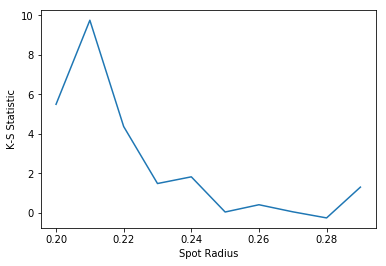

In [76]:
plt.plot(radii_fast, stats_fast)
plt.xlabel('Spot Radius')
plt.ylabel('A-D Statistic')

Ks_2sampResult(statistic=0.16857142857142859, pvalue=0.26606304709604667)


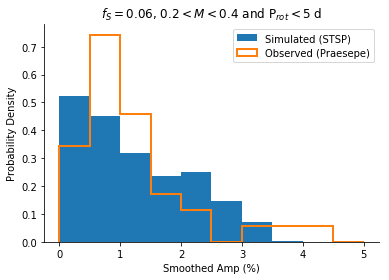

In [81]:
#sm_amp, frac = np.loadtxt('data/kde.txt', unpack=True)

stat, ptp = ks(radii_fast[np.argmin(stats_fast)], amps_fast, n_stars=1000)

print(ks_2samp(ptp, amps_fast))

spot_coverage = n_spots * np.pi*radii_fast[np.argmin(stats_fast)]**2 / (4*np.pi)

n_bins = 10
bin_range = [0, 5.0]
plt.hist(ptp, bins=n_bins, density=True, range=bin_range, label='Simulated (STSP)')
plt.hist(amps_fast, bins=n_bins, density=True, range=bin_range, histtype='step', lw=2, label='Observed (Praesepe)')
#plt.title('$\\rm N_{{stars}}$ = {0}'.format(n_stars))
plt.title('$f_S = {0:.2f}$, $0.2 < M < 0.4$ and P$_{{rot}} < 5$ d'.format(spot_coverage))
plt.xlabel('Smoothed Amp (%)')
plt.ylabel('Probability Density')
plt.legend()
for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)
plt.savefig('plots/simulated_fast.pdf', bbox_inches='tight', dpi=200)
#plt.plot(sm_amp, frac)

In [78]:
p_rot = 23.9
n_spots = 3
spot_radii = 0.2
n_stars = 100

amps_slow = np.loadtxt('data/amps_slow.txt')

print('spot area:', n_spots * np.pi*spot_radii**2 / (4*np.pi))

times = Time(np.linspace(0, p_rot, n_times), format='jd')


radii_slow = np.arange(0.2, 0.25, 0.01)
stats_slow = []
for spot_radii in radii_slow:

    stat, ptp = ks(spot_radii, amps_slow)
    
    stats_slow.append(stat)

spot area: 0.030000000000000006


Text(0, 0.5, 'A-D Statistic')

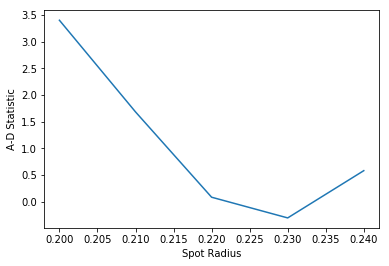

In [79]:
plt.plot(radii_slow, stats_slow)
plt.xlabel('Spot Radius')
plt.ylabel('A-D Statistic')

In [84]:
len(amps_fast)

35

Ks_2sampResult(statistic=0.20297297297297298, pvalue=0.092120625278175924)


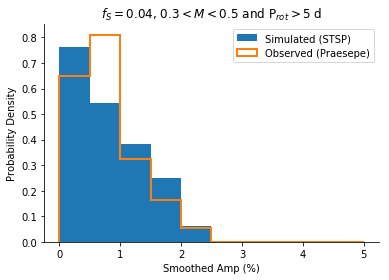

In [86]:
spot_radii = 0.2
stat, ptp = ks(radii_slow[np.argmin(stats_slow)], amps_slow, n_stars=1000)

print(ks_2samp(ptp, amps_slow))

spot_coverage = n_spots * np.pi*radii_slow[np.argmin(stats_slow)]**2 / (4*np.pi)

plt.hist(ptp, bins=n_bins, density=True, range=bin_range, label='Simulated (STSP)')
plt.hist(amps_slow, bins=n_bins, density=True, range=bin_range, histtype='step', lw=2, label='Observed (Praesepe)')
#plt.title('$\\rm N_{{stars}}$ = {0}'.format(n_stars))
plt.title('$f_S = {0:.2f}$, $0.3 < M < 0.5$ and P$_{{rot}} > 5$ d'.format(spot_coverage))
plt.xlabel('Smoothed Amp (%)')
plt.ylabel('Probability Density')
plt.legend()
for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)
plt.savefig('plots/simulated_slow.pdf', bbox_inches='tight', dpi=200)
#plt.plot(sm_amp, frac)

In [90]:
radii_slow[np.argmin(stats_slow)], radii_fast[np.argmin(stats_fast)]

(0.23000000000000004, 0.28000000000000008)